# Business Problem

A financial services company wants to expand its business portfolio by entering the credit card business.  The company executives also recognize that fraud is a paramount issue.  As a result, the firm tasks KBO Analytics with the following:

- Create a model prototype to detect credit card fraud
- Identify characteristics that signal whether or not credit card fraud will take place

# Data Understanding

The data for examing the aforementioned problem comes from the following source: Churn in Telecom's dataset.

Before beginning to identify any trends with customers that churn, I want to examine and become familiar with the dataset. I will conduct exploratory data analysis in order to understand the dataset attributes, which includes, but not limited to the following:

1. Number of Columns
2. Number of Rows
3. Column Names
4. Format of the data in each column

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from datetime import datetime

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [2]:
# Reading file

fraud_df = pd.read_csv("fraud_data.csv")

In [3]:
# Examining initial 10 columns of the dataframe

fraud_df.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [4]:
# Examining last 10 columns of the dataframe

fraud_df.tail(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14436,22-01-2019 00:18,"""Connelly, Reichert and Fritsch""",gas_transport,93.23,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,58d980b2db4f0581aaa3e62967072efa,40.527285,-93.859674,0
14437,22-01-2019 00:19,"""Kuhic, Bins and Pfeffe""",shopping_net,4.65,Eugene,OR,44.0385,-123.0614,191096,"""Scientist, physiological""",06-04-1964,6f552aa7397e6e1c012c25ecfc0cc9b7,43.821635,-122.497236,0
14438,22-01-2019 00:23,Sporer Inc,gas_transport,51.57,Carlotta,CA,40.5070,-123.9743,1139,"""Therapist, occupational""",15-01-1951,c10ca0af6656b71e6da577da9db6c8c3,40.556556,-124.887658,0
14439,22-01-2019 00:32,"""Willms, Kris and Bergnaum""",shopping_pos,145.60,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,c206b545e52a142e1009fb0bd3e3f2ac,46.592719,-118.002289,0
14440,22-01-2019 00:37,Wiza LLC,misc_pos,37.92,Syracuse,MO,38.6547,-92.8929,628,"""Radiographer, diagnostic""",18-12-1961,a98a9e2ca6a7c605c34a4298be3ad606,39.245730,-92.441388,0
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0
14445,22-01-2019 00:55,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0


In [5]:
# Examining the dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

I created a Pandas Dataframe.  The Dataframe contains 14,446 rows of data.  The Dataframe contains 15 columns, which are the following:
    
1. Transaction Date and Time
2. Merchant Name 
3. Category of Merchant 
4. Amount of Transaction
5. City of Credit Card Holder 
6. State of Credit Card Holder 
7. Latitute Location of Purchase
8. Longitude Location of Purchase
9. Credit Card Holder's City Population
10. Job of Credit Card Holder 
11. Date of Bright of Credit Card Holder
12. Transaction Number 
13. Latitude of Location of Merchant
14. Longitude Location of Merchant
15. Whether Transaction is Fraud or Not    

## Missing Data

In [6]:
# Examining missing values in each column

fraud_df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

I utilized the following code - *fraud_df.isna().sum()* - to check for missing values in each column.  There are no missing values in any of the columns.

## Duplicate Data

In [7]:
# Examining dataframe for duplicate data

fraud_df.duplicated().sum()

63

In [8]:
# Creating a dataframe for duplicates

duplicates_all = fraud_df[fraud_df.duplicated(keep=False)]

In [9]:
# Examining the first 20 rows of the duplicates dataframe

duplicates_all.head(20)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [10]:
# Examining the last 20 rows of the duplicates dataframe

duplicates_all.tail(20)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
12092,14-01-2019 16:15,"""Baumbach, Hodkiewicz and Walsh""",shopping_pos,839.35,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,7f9497dfc82f973690fd20102c502210,42.337832,-99.342280,1
12222,14-01-2019 22:28,Beier-Hyatt,shopping_pos,969.64,San Jose,CA,37.3304,-121.7913,973849,Science writer,12-06-1955,163aa0609a5b81e3b3be72fb7bc31ed3,36.709536,-122.649175,1
12238,14-01-2019 23:17,"""Reichert, Huels and Hoppe""",shopping_net,1034.21,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,d861ecd9fb05ec1832e4168e31cda378,41.124870,-100.349332,1
12239,14-01-2019 23:18,"""Konopelski, Schneider and Hartmann""",food_dining,121.62,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,31001f18f1cc19cfde92209361884e06,40.544371,-98.726597,1
12274,15-01-2019 01:07,VonRueden Group,grocery_net,15.05,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,f3d6f1020342e0aec86a1483d85a52d4,42.015822,-98.943391,1
12643,15-01-2019 22:50,Koelpin and Sons,misc_net,851.71,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,22b7c01ff32367d1c58037196e9b6afb,40.461654,-98.987825,1
12647,15-01-2019 23:01,"""Little, Gutmann and Lynch""",shopping_net,1124.01,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,18754b81f40491fc7058342bf61eb82e,40.650720,-98.820629,1
12650,15-01-2019 23:12,"""Reichert, Shanahan and Hayes""",shopping_net,1140.41,Westerville,NE,41.4193,-99.3844,73,Product designer,10-02-1935,7da32f9ad2d6aa478131b5f7fa51fee5,41.151133,-99.382380,1
12905,17-01-2019 01:30,"""Monahan, Bogisich and Ledne""",misc_pos,795.59,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,5d6931d4ac32d177b708ed9785d409ea,38.278335,-109.044284,1
12962,17-01-2019 08:59,Kutch LLC,gas_transport,9.79,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,73d976fc46f089af2c58c39273525b55,39.157345,-109.126592,1


I utilized the following code - *fraud_df.duplicated().sum()* - to understand how many duplicated rows are in the dataframe.  There is a total of 63 duplicate rows.

## Examining Columns

I am going to conduct additional exploratory analysis for the following columns:
    
- Whether Transaction is Fraud or Not
- Merchant Name
- Category of Merchant
- City of Credit Card Holder
- State of Credit Card Holder
- Job of Credit Card Holder
- Transaction Number

The following column - Whether Transaction is Fraud or Not - is the target.  This is the column that captures the non-fradulent and fradulent transactions.

The remaining columns are categorical.  I want to examine the distribution of the data within each column.

### Whether Transaction is Fraud or Not

In [11]:
# Examining how many values of fraud are in the following column: 'is_fraud'

fraud_df['is_fraud'].value_counts()

0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: is_fraud, dtype: int64

**Observations | Whether Transaction is Fraud or Not**    

I utilized the following code - *fraud_df['is_fraud'].value_counts()* - to understand how many cases of fraud exist within the dataframe.

There 12,600 cases of no fraud.  There are 1,844 cases of fraud.  As expected, there is a class imbalance of fraud within the dataset.

I want to note there is a row with the following entry - *0"2019-01-01 00:00:44"*.  I am assuming this is a non-fradulent case in which the transaction date and time was incorporated.  I will remove the timestamp during the data cleaning phase.

I also want to note there is a row with the following entry - *1"2020-12-24 16:56:24"*.  I am assuming this is a fradulent case in which the transaction date and time was incorporated.  I will remove the timestamp during the data cleaning phase.

A bar chart that breaks down the non-fradulent and fradulent cases is below.

Text(0.5, 1.0, 'Breakdown of Fraud Cases')

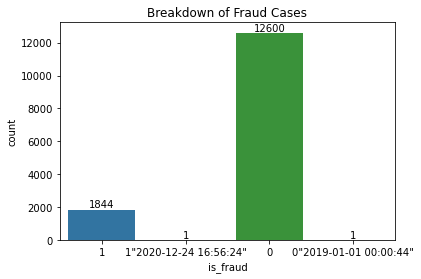

In [12]:
# Create a bar chart for Value Counts of the 'is_fraud' column

ax = sns.countplot(x='is_fraud', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Fraud Cases")

### Merchant Name

In [13]:
# Examining the number of unique categories in the 'merchant' column

fraud_df['merchant'].nunique()

693

In [14]:
# Examining the value counts for each unique category in the 'merchant' column

fraud_df['merchant'].value_counts()

Kilback LLC                       58
Cormier LLC                       48
Kutch and Sons                    46
Rau and Sons                      44
McDermott-Weimann                 42
                                  ..
Jaskolski-Dibbert                  4
"Ferry, Reichel and DuBuque"       4
Lemke and Sons                     4
"Hagenes, Hermann and Stroman"     4
Kovacek Lt                         3
Name: merchant, Length: 693, dtype: int64

In [15]:
# Examining the value counts for the top 30 categories in the 'merchant' column

fraud_df['merchant'].value_counts()[0:30]

Kilback LLC                               58
Cormier LLC                               48
Kutch and Sons                            46
Rau and Sons                              44
McDermott-Weimann                         42
Kiehn-Emmerich                            42
Boyer PLC                                 41
Emard Inc                                 40
Kutch-Wilderman                           39
Murray-Smitham                            39
Kuhn LLC                                  39
Hudson-Grady                              38
Stark-Koss                                38
Gerhold LLC                               38
"Osinski, Ledner and Leuschke"            38
Dickinson Lt                              38
"Baumbach, Strosin and Nicolas"           37
Doyle Lt                                  37
Boyer-Reichert                            37
Hudson-Ratke                              37
Padberg-Welch                             37
Torp-Labadie                              37
"Romaguera

**Observations | Merchant Name**    

I utilized the following code - *fraud_df['merchant'].nunique()* - to identify the number of unique categories in the Merchant column.  There are 693 different categories in the Merchant column.  

I utilized the following code - fraud_df['merchant'].value_counts() - to understand the distribution of the categories within the Merchant column.  The top 5 categories with their respective value counts are the following:
    
- Kilback LLC - 58
- Cormier LLC - 48
- Kutch and Sons - 46
- Rau and Sons - 44
- Kiehn-Emmerich - 42
    
Based on the observations, there is a high degree of cardinality, or many unique categories, within the Merchant column.
    
I utilized the following code - *fraud_df['merchant'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

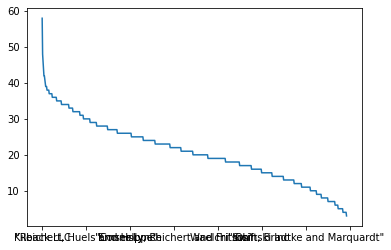

In [16]:
# Visualization of the cardinality of the 'Merchant' column

fraud_df['merchant'].value_counts().plot()

### Category (of Merchant)

In [17]:
# Examining the number of unique categories in the 'category' column

fraud_df['category'].nunique()

14

In [18]:
# Examining the value counts for each unique category in the 'category' column

fraud_df['category'].value_counts()

grocery_pos       1602
gas_transport     1430
shopping_net      1408
shopping_pos      1354
home              1304
kids_pets         1141
personal_care      990
entertainment      953
health_fitness     891
food_dining        870
misc_pos           823
misc_net           821
grocery_net        474
travel             385
Name: category, dtype: int64

**Observations | Category (of Merchant)** 

I utilized the following code - *fraud_df['category'].nunique()* - to identify the number of unique categories in the Category column.  There are 14 different categories in the Category column.  

I utilized the following code - fraud_df['category'].value_counts() - to understand the distribution of the categories within the Category column.  The top 5 categories with their respective value counts are the following:
    
- *grocery_pos* - 1602
- *gas_transport* - 1430
- *shopping_net* - 1408
- *shopping_pos* - 1354
- *home* - 1304
    
Based on the observations, there is a low degree of cardinality, or few unique categories, within the Category column.
    
I utilized the following code - *fraud_df['category'].value_counts().plot()* - to provide a visualization of the low cardinality, which is below.

<AxesSubplot:>

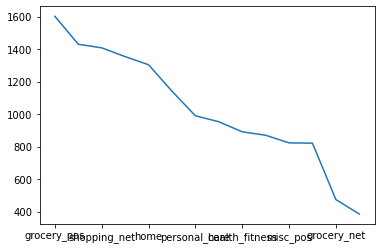

In [19]:
# Visualization of the cardinality of the 'Category' column

fraud_df['category'].value_counts().plot()

In [20]:
# Creating a dataframe that only has the fradulent transactions

all_fraud_cases = fraud_df[fraud_df['is_fraud'] == '1']

In [21]:
# Examining the values counts of the Category column within the new dataframe - 'all_fraud_cases'

all_fraud_cases['category'].value_counts()

grocery_pos       444
shopping_net      396
misc_net          223
shopping_pos      194
gas_transport     159
misc_pos           64
entertainment      59
personal_care      57
kids_pets          56
home               51
food_dining        39
health_fitness     36
travel             34
grocery_net        32
Name: category, dtype: int64

I created a dataframe that only has the fradulent credit card transactions.  The top five merchant categories that have fradulent transactionss are the following:

- *grocery_pos* - 444
- *shopping_net* - 396
- *misc_net* - 223
- *shopping_pos* - 194
- *gas_transport* - 159

Upon observing the data, I see there are opportunities to group some of the merchant categories together.  For example, *food_dining* category can become part of the *entertainment* category.

I also created a bar chart to represent which merchant categories have the most fradulent cases.  The bar chart is below.

Text(0.5, 1.0, 'Breakdown of Merchant Category for Fraud Cases')

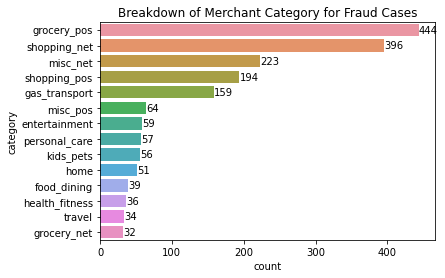

In [22]:
# Get the sorted index of categories based on their counts
sorted_categories = all_fraud_cases['category'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='category', data=all_fraud_cases, order=sorted_categories)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Merchant Category for Fraud Cases")

### City of Credit Card Holder

In [23]:
# Examining the number of unique categories in the 'city' column

fraud_df['city'].nunique()

176

In [24]:
# Examining the value counts for each unique category in the 'city' column

fraud_df['city'].value_counts()

Phoenix          297
Centerview       197
Orient           192
Fort Washakie    187
Sutherland       187
                ... 
Kirtland          10
Buellton           8
Wappapello         8
Pleasant Hill      8
Vacaville          7
Name: city, Length: 176, dtype: int64

**Observations | City of Credit Card Holder** 

I utilized the following code - *fraud_df['city'].nunique()* - to identify the number of unique categories in the City column.  There are 176 different categories in the City column.  

I utilized the following code - fraud_df['city'].value_counts() - to understand the distribution of the categories within the City column.  The top 5 categories with their respective value counts are the following:
    
- Phoenix - 297
- Centerview - 197
- Orient - 192
- Sutherland - 187
- Fort Washakie - 187
    
Based on the observations, there is a high degree of cardinality, or many unique categories, within the City column.
    
I utilized the following code - *fraud_df['city'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

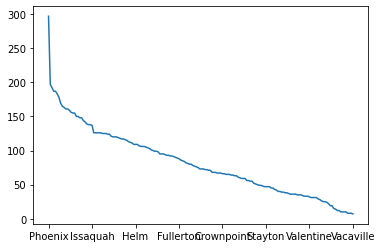

In [25]:
# Visualization of the cardinality of the 'City' column

fraud_df['city'].value_counts().plot()

### State of Credit Card Holder

In [26]:
# Examining the number of unique categories in the 'state' column

fraud_df['state'].nunique()

13

In [27]:
# Examining the value counts for each unique category in the 'state' column

fraud_df['state'].value_counts()

CA    3375
MO    2329
NE    1460
OR    1211
WA    1150
WY    1100
NM    1003
CO     856
AZ     673
UT     597
ID     347
AK     173
HI     172
Name: state, dtype: int64

**Observations | State of Credit Card Holder** 

I utilized the following code - *fraud_df['state'].nunique()* - to identify the number of unique categories in the State column.  There are 13 different categories in the State column.  

I utilized the following code - fraud_df['state'].value_counts() - to understand the distribution of the categories within the State column.  The top 5 categories with their respective value counts are the following:
    
- CA - 3375
- MO - 2329
- NE - 1460
- OR - 1211
- WA - 1150
    
Based on the observations, there is a low degree of cardinality, or few unique categories, within the State column.
    
I utilized the following code - *fraud_df['state'].value_counts().plot()* - to provide a visualization of the low cardinality, which is below.

<AxesSubplot:>

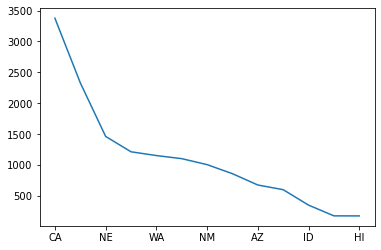

In [28]:
# Visualization of the cardinality of the 'State' column

fraud_df['state'].value_counts().plot()

In [29]:
# Examining the values counts of the State column within the new dataframe - 'all_fraud_cases'

all_fraud_cases['state'].value_counts()

CA    410
MO    267
NE    238
OR    197
WA    126
NM    121
WY    119
CO    115
UT     73
AK     65
AZ     64
ID     33
HI     16
Name: state, dtype: int64

I leveraged the dataframe that only has the fradulent credit card transactions.  The top five states that have fradulent transactionss are the following:

- CA - 410
- MO - 267
- NE - 238
- OR - 197
- WA - 126

Upon observing the data, I see there are opportunities to group some of the states together.  For example, I can group the states into the following categories: West, Southwest, and Midwest.  However, I would be inclined to maintain California (CA), Alaska (AK), and HI (Hawaii) as standalone states.

I also created a bar chart to represent which states have the most fradulent cases.  The bar chart is below.

Text(0.5, 1.0, 'Breakdown of States for Fraud Cases')

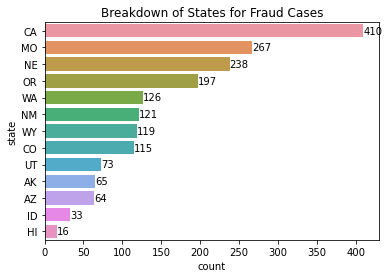

In [30]:
# Get the sorted index of states based on their counts
sorted_states = all_fraud_cases['state'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='state', data=all_fraud_cases, order=sorted_states)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of States for Fraud Cases")

### Job of Credit Card Holder

In [31]:
# Examining the number of unique categories in the 'job' column

fraud_df['job'].nunique()

163

In [32]:
# Examining the value counts for each unique category in the 'job' column

fraud_df['job'].value_counts()

"Surveyor, minerals"            262
"Surveyor, land/geomatics"      240
Land/geomatics surveyor         225
Insurance broker                209
Electronics engineer            197
                               ... 
Systems developer                 9
Landscape architect               9
Research scientist (medical)      8
Information officer               8
Clinical cytogeneticist           7
Name: job, Length: 163, dtype: int64

**Observations | Job of Credit Card Holder** 

I utilized the following code - *fraud_df['job'].nunique()* - to identify the number of unique categories in the Job column.  There are 163 different categories in the Job column.  

I utilized the following code - fraud_df['job'].value_counts() - to understand the distribution of the categories within the Job column.  The top 5 categories with their respective value counts are the following:
    
- Surveyor, minerals - 262
- Surveyor, land/geomatics - 240
- Land/geomatics surveyor - 225
- Insurance broker - 209
- Electronics engineer - 197
    
Based on the observations, there is a high degree of cardinality, or many unique categories, within the Job column.
    
I utilized the following code - *fraud_df['job'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

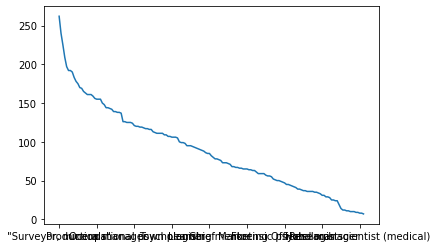

In [33]:
# Visualization of the cardinality of the 'Job' column

fraud_df['job'].value_counts().plot()

### Transaction Number

In [34]:
# Examining the number of unique categories in the 'transaction number' column

fraud_df['trans_num'].nunique()

14383

In [35]:
# Examining the value counts for each unique category in the 'transaction number' column

fraud_df['trans_num'].value_counts()

436937887b481bbb237956bb4e592193    2
9bc5cb494abc3af2b02ca33e0d076f74    2
a3806e984cec6ac0096d8184c64ad3a1    2
163aa0609a5b81e3b3be72fb7bc31ed3    2
f1c51701d8b5dd6ebfe7c1aebf0c4fe7    2
                                   ..
9bbb5715b60515bf3d4bb69c0d69fbc5    1
df536a0d08839738ef27a5d6c4cc2b68    1
0719943f3c1ba1ac194058bf53066d51    1
ab62ff878edb234b337b3229d3d77205    1
8ec0c0e439ab00b1c76fdcfc525d07e5    1
Name: trans_num, Length: 14383, dtype: int64

**Observations | Transaction Number** 

I utilized the following code - *fraud_df['trans_num'].nunique()* - to identify the number of unique categories in the Transaction Number column.  There are 14383 different categories in the Transaction Number column.  

I utilized the following code - *fraud_df['trans_num'].value_counts()* - to understand the distribution of the categories within the Job column.
    
Based on the observations, this column has the highest degree of cardinality in comparison to all of the other columns in the dataset.  This is expected.  A transaction number is a unique identifier that is specific for a singular transaction.  
    
I utilized the following code - *fraud_df['trans_num'].value_counts().plot()* - to provide a visualization of the high cardinality, which is below.

<AxesSubplot:>

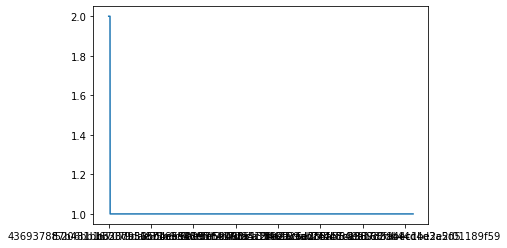

In [36]:
fraud_df['trans_num'].value_counts().plot()

# Data Preparation

I have completed the Data Understanding stage.  I will transition to preparing the data for modeling via the following stages:

**Duplicate Data**
- Remove Duplicates

**Columns to Drop**
- Remove the Merchant column, or *fraud_df['merchant']*
- Remove the City of Credit Card Holder column, or *fraud_df['city']*
- Remove the Job of Credit Card Holder column, or *fraud_df['job']*
- Remove the Transaction Number column, or *fraud_df['trans_num']*

**Reclassify Data Entries in the Category (of Merchant) column**
- For the rows in which there is an entry of *food_dining*, reclassify to *entertainment*

**Reclassify Data Entries in the 'Whether Transaction is Fraud or Not' Column**
- For the row in which there is an entry of *0"2019-01-01 00:00:44"*, reclassify it to 0
- For the row in which there is an entry of *1"2020-12-24 16:56:24"*, reclassify it to 1
- For the rows in which there is an entry of 0, reclassify to *Not Fraud*
- For the rows in which there is an entry of 1, reclassify to *Fraud*

**State of Credit Card Holder**
- For the rows in which CA is listed, reclassify to California
- Reclassify others states into US regions (i.e. - West, Southwest, and Midwest)
- Rename state column as region

**Transaction Date | Transaction Time Column**
- Create a hour column based on the Transaction Date | Transaction Time Column
- Create a month column based on the Transaction Date | Transaction Time Column
- Create a year column based on the Transaction Date | Transaction Time Column

## Duplicate Data

In [37]:
# Checking the amount of rows in the 'fraud_df' dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [38]:
# Dropping Duplicate Columns from the 'fraud_df' dataframe

fraud_df.drop_duplicates(inplace=True)

In [39]:
# Checking the amount of rows in the 'fraud_df' dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   merchant               14383 non-null  object 
 2   category               14383 non-null  object 
 3   amt                    14383 non-null  float64
 4   city                   14383 non-null  object 
 5   state                  14383 non-null  object 
 6   lat                    14383 non-null  float64
 7   long                   14383 non-null  float64
 8   city_pop               14383 non-null  int64  
 9   job                    14383 non-null  object 
 10  dob                    14383 non-null  object 
 11  trans_num              14383 non-null  object 
 12  merch_lat              14383 non-null  float64
 13  merch_long             14383 non-null  float64
 14  is_fraud               14383 non-null  object 
dtypes:

I utilized the following code - *fraud_df.drop_duplicates(inplace=True)* - to remove the duplicates from the *fraud_df* dataframe.  There were originally 14,446 rows of data.  There are currently 14,383 rows of data.

## Columns to Drop

In [40]:
# Dropping the following columns - fraud_df['merchant'], fraud_df['city'], fraud_df['job'], and fraud_df['trans_num'] 

fraud_df.drop(columns=['merchant', 'city', 'job', 'trans_num'], inplace=True)

In [41]:
# Checking whether or not the columns have been removed from the dataframe

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   category               14383 non-null  object 
 2   amt                    14383 non-null  float64
 3   state                  14383 non-null  object 
 4   lat                    14383 non-null  float64
 5   long                   14383 non-null  float64
 6   city_pop               14383 non-null  int64  
 7   dob                    14383 non-null  object 
 8   merch_lat              14383 non-null  float64
 9   merch_long             14383 non-null  float64
 10  is_fraud               14383 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.3+ MB


I utilized the following code - *fraud_df.drop(columns=['merchant', 'city', 'job', 'trans_num'], inplace=True)* to remove the following columns:

- *fraud_df['merchant']*
- *fraud_df['city']*
- *fraud_df['job']*
- *fraud_df['trans_num']* 

Due to high cardinality, I removed the aforementioned columns.  There were originally fifteen columns in the dataframe.  There are currently 11 columns in the dataframe.

## Category (of Merchant) Column

In [42]:
# Checking the different categories in the 'fraud_df['category']' column

fraud_df['category'].unique()

array(['grocery_net', 'shopping_net', 'misc_pos', 'grocery_pos',
       'health_fitness', 'gas_transport', 'misc_net', 'kids_pets',
       'shopping_pos', 'entertainment', 'food_dining', 'home',
       'personal_care', 'travel'], dtype=object)

In [43]:
# Checking the different categories in the 'fraud_df['category']' column

fraud_df['category'].value_counts()

grocery_pos       1591
gas_transport     1424
shopping_net      1393
shopping_pos      1347
home              1303
kids_pets         1140
personal_care      988
entertainment      949
health_fitness     890
food_dining        869
misc_pos           821
misc_net           815
grocery_net        469
travel             384
Name: category, dtype: int64

In [44]:
# Categorizing the 'food_dining' values into 'entertainment'

fraud_df['category'] = fraud_df['category'].str.replace('food_dining', 'entertainment')

In [45]:
# Checking whether or not the categorization of 'food_dining' values into 'entertainment' is complete

fraud_df['category'].value_counts()

entertainment     1818
grocery_pos       1591
gas_transport     1424
shopping_net      1393
shopping_pos      1347
home              1303
kids_pets         1140
personal_care      988
health_fitness     890
misc_pos           821
misc_net           815
grocery_net        469
travel             384
Name: category, dtype: int64

I utilized the following code to reclassify the 'food_dining' values into 'entertainment'.  There were originally 949 credit card transactions for entertainment.  There are currently 1,818 credit card transaction values for entertainment.  Bar chart is below to display the breakdown.

Text(0.5, 1.0, 'Breakdown of Merchant Category')

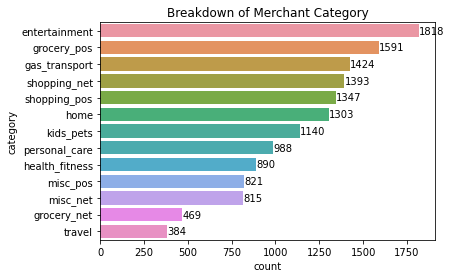

In [46]:
# Get the sorted index of categories based on their counts
sorted_categories_fraud_df = fraud_df['category'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='category', data=fraud_df, order=sorted_categories_fraud_df)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Merchant Category")

## Whether Transaction is Fraud or Not Column

In [47]:
# Checking the different categories in the 'fraud_df['is_fraud']' column

fraud_df['is_fraud'].value_counts()

0                         12600
1                          1781
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: is_fraud, dtype: int64

In [48]:
# Reclassifying the entry of '1"2020-12-24 16:56:24"'' to '1'

# Reclassifying the entry of '0"2019-01-01 00:00:44" to '0'

fraud_df['is_fraud'] = fraud_df['is_fraud'].str.replace('1"2020-12-24 16:56:24"', '1').str.replace('0"2019-01-01 00:00:44"', '0')

In [49]:
# Checking the different categories in the 'fraud_df['is_fraud']' column

fraud_df['is_fraud'].value_counts()

0    12601
1     1782
Name: is_fraud, dtype: int64

In [50]:
# Reclassifying the entries of '0' to 'Not Fraud'

# Reclassifying the entries of '1' to 'Fraud'

fraud_df['is_fraud'] = fraud_df['is_fraud'].str.replace('0','Not Fraud').str.replace('1','Fraud')

In [51]:
# Checking the different categories in the 'fraud_df['is_fraud']' column

fraud_df['is_fraud'].value_counts()

Not Fraud    12601
Fraud         1782
Name: is_fraud, dtype: int64

The data cleaning and preparation for the Fraud column is complete.  There are currently 12,601 cases of no fraud, and 1,782 cases of Fraud.  A breakdown is shown via bar chart below.

Text(0.5, 1.0, 'Breakdown of Fraud Cases')

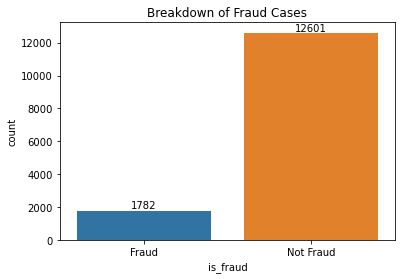

In [52]:
# Create a bar chart for Value Counts of the 'is_fraud' column

ax = sns.countplot(x='is_fraud', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Fraud Cases")

## State of Credit Card Holder

In [53]:
# Checking the different categories in the 'fraud_df['state']' column

fraud_df['state'].value_counts()

CA    3366
MO    2324
NE    1438
OR    1211
WA    1150
WY    1100
NM    1003
CO     856
AZ     673
UT     585
ID     347
HI     172
AK     158
Name: state, dtype: int64

In [54]:
state_mapping_table = {
                        'CA': 'California',
                        'MO': 'Midwest',
                        'NE': 'Midwest',
                        'OR': 'West',
                        'WA': 'West',
                        'WY': 'West',
                        'CO': 'West',
                        'UT': 'West',
                        'ID': 'West',
                        'HI': 'West',
                        'AK': 'West',
                        'NM': 'SouthWest',
                        'AZ': 'Southwest'
                            }

In [55]:
# Mapping the 'state_mapping_table' to the 'State' column

fraud_df['state'] = fraud_df['state'].map(state_mapping_table)

In [56]:
# Checking the different categories in the 'fraud_df['state']' column

fraud_df['state'].value_counts()

West          5579
Midwest       3762
California    3366
SouthWest     1003
Southwest      673
Name: state, dtype: int64

In [57]:
fraud_df.rename(columns = {'state':'region'}, inplace=True)

In [58]:
# Verifying whether or not the 'State' column has been renamed to 'Region'

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   category               14383 non-null  object 
 2   amt                    14383 non-null  float64
 3   region                 14383 non-null  object 
 4   lat                    14383 non-null  float64
 5   long                   14383 non-null  float64
 6   city_pop               14383 non-null  int64  
 7   dob                    14383 non-null  object 
 8   merch_lat              14383 non-null  float64
 9   merch_long             14383 non-null  float64
 10  is_fraud               14383 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.9+ MB


I have completed grouping the states into regions based on the following source: [National Geographic United States Regions](https://education.nationalgeographic.org/resource/united-states-regions/).  I decided to maintain California as its own since it is the state with the most credit card transactions.

I also renamed the state column as region.  The bar chart below provides a breakdown of credit card transactions by region.

Text(0.5, 1.0, 'Breakdown of Credit Card Transactions by Region')

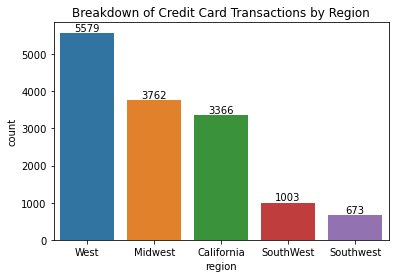

In [59]:
# Create a bar chart for Value Counts of the 'Region' column

ax = sns.countplot(x='region', data=fraud_df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Credit Card Transactions by Region")

## Transaction Date | Transaction Time Column

In [60]:
# Examining the Data Type of the 'Transaction Date / Transaction Time' column

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14383 non-null  object 
 1   category               14383 non-null  object 
 2   amt                    14383 non-null  float64
 3   region                 14383 non-null  object 
 4   lat                    14383 non-null  float64
 5   long                   14383 non-null  float64
 6   city_pop               14383 non-null  int64  
 7   dob                    14383 non-null  object 
 8   merch_lat              14383 non-null  float64
 9   merch_long             14383 non-null  float64
 10  is_fraud               14383 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.9+ MB


In [61]:
# Converting data type of the 'Transaction Date / Transaction Time' column to datetime

fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

In [62]:
# Verifying whether or not the data type of the 'Transaction Date / Transaction Time' column has been converted to datetime

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   dob                    14383 non-null  object        
 8   merch_lat              14383 non-null  float64       
 9   merch_long             14383 non-null  float64       
 10  is_fraud               14383 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.9+ MB


### Creating a Hour Column

In [63]:
# Creating the 'Hour' column by extrapolating the hour from the 'Transaction Date / Transaction Time' column 

fraud_df['hour'] = fraud_df['trans_date_trans_time'].dt.hour

In [64]:
# Checking whether or not the 'Hour' column has been created

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   dob                    14383 non-null  object        
 8   merch_lat              14383 non-null  float64       
 9   merch_long             14383 non-null  float64       
 10  is_fraud               14383 non-null  object        
 11  hour                   14383 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory

In [65]:
# Examining the contents of the 'Hour' column

fraud_df['hour'].head(10)

0     0
1    15
2    22
3    23
4    23
5     3
6     3
7    11
8    18
9    22
Name: hour, dtype: int64

In [66]:
# Examining the value counts for each hour in the 'Hour' column

fraud_df['hour'].value_counts()

23    1109
22    1104
20     702
21     691
15     669
19     667
17     666
18     662
16     652
13     638
14     629
12     624
1      607
0      581
3      560
2      519
7      438
10     418
8      416
6      415
4      413
5      406
11     401
9      396
Name: hour, dtype: int64

I have created a new column titled *fraud_df['hour']*.  An interesting observation is that the number of credit card transactions increase as midnight approaches.  The bar chart below reflects the breakdown of credit card transactions by the hour.

Text(0.5, 1.0, 'Breakdown of Top 10 Credit Card Transactions by Hour')

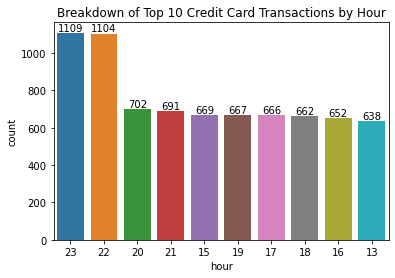

In [67]:
# Get the top 10 hours with the most transactions
top_10_hours = fraud_df['hour'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 hours
filtered_fraud_df = fraud_df[fraud_df['hour'].isin(top_10_hours)]

# Creating the bar chart with only the top 10 hours
ax = sns.countplot(x='hour', data=filtered_fraud_df, order=top_10_hours)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Top 10 Credit Card Transactions by Hour")

In [68]:
# Examining the 'all_fraud_cases' dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1844 non-null   object 
 1   merchant               1844 non-null   object 
 2   category               1844 non-null   object 
 3   amt                    1844 non-null   float64
 4   city                   1844 non-null   object 
 5   state                  1844 non-null   object 
 6   lat                    1844 non-null   float64
 7   long                   1844 non-null   float64
 8   city_pop               1844 non-null   int64  
 9   job                    1844 non-null   object 
 10  dob                    1844 non-null   object 
 11  trans_num              1844 non-null   object 
 12  merch_lat              1844 non-null   float64
 13  merch_long             1844 non-null   float64
 14  is_fraud               1844 non-null   object 
dtypes: 

In [69]:
# Converting data type of the 'Transaction Date / Transaction Time' column to datetime via "all_fraud_cases" dataframe

all_fraud_cases['trans_date_trans_time'] = pd.to_datetime(all_fraud_cases['trans_date_trans_time'])

In [70]:
# Verifying whether or not the data type of the 'Transaction Date / Transaction Time' column has been converted to datetime via "all_fraud_cases" dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1844 non-null   datetime64[ns]
 1   merchant               1844 non-null   object        
 2   category               1844 non-null   object        
 3   amt                    1844 non-null   float64       
 4   city                   1844 non-null   object        
 5   state                  1844 non-null   object        
 6   lat                    1844 non-null   float64       
 7   long                   1844 non-null   float64       
 8   city_pop               1844 non-null   int64         
 9   job                    1844 non-null   object        
 10  dob                    1844 non-null   object        
 11  trans_num              1844 non-null   object        
 12  merch_lat              1844 non-null   float64       
 13  me

In [71]:
# Creating the 'Hour' column by extrapolating the hour from the 'Transaction Date / Transaction Time' column via "all_fraud_cases" dataframe

all_fraud_cases['hour'] = all_fraud_cases['trans_date_trans_time'].dt.hour

In [72]:
# Checking whether or not the 'Hour' column has been created via "all_fraud_cases" dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1844 non-null   datetime64[ns]
 1   merchant               1844 non-null   object        
 2   category               1844 non-null   object        
 3   amt                    1844 non-null   float64       
 4   city                   1844 non-null   object        
 5   state                  1844 non-null   object        
 6   lat                    1844 non-null   float64       
 7   long                   1844 non-null   float64       
 8   city_pop               1844 non-null   int64         
 9   job                    1844 non-null   object        
 10  dob                    1844 non-null   object        
 11  trans_num              1844 non-null   object        
 12  merch_lat              1844 non-null   float64       
 13  me

In [73]:
# Examining the contents of the 'Hour' column via "all_fraud_cases" dataframe

all_fraud_cases['hour'].head(10)

0     0
1    15
2    22
3    23
4    23
5     3
6     3
7    11
8    18
9    22
Name: hour, dtype: int64

In [74]:
# Examining the value counts for each hour in the 'Hour' column "all_fraud_cases" dataframe

all_fraud_cases['hour'].value_counts()

23    476
22    468
1     174
0     174
3     147
2     142
16     24
15     24
20     23
17     20
18     20
21     18
12     17
14     16
13     14
8      14
9      12
19     11
5      10
10     10
7       9
4       7
6       7
11      7
Name: hour, dtype: int64

Based on the aforementioned bar chart - *Breakdown of Top 10 Credit Card Transactions by Hour* - I assumed that most of the fraud cases took place as midnight approached.

To investigate this, I utilized the dataframe I created that only contained the fraud cases.  Based on the following bar chart - *Breakdown of Top 10 Fraud Cases by Hour* - it seems my assumption is true.  As midnight approaches, the number of fraud cases increase.

Text(0.5, 1.0, 'Breakdown of Top 10 Fraud Cases by Hour')

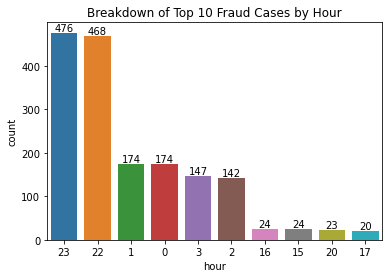

In [75]:
# Get the top 10 hours with the most fraud cases
top_10_hours_fraud_cases = all_fraud_cases['hour'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 hours in respect to fraud cases
filtered_fraud_cases_df = all_fraud_cases[all_fraud_cases['hour'].isin(top_10_hours_fraud_cases)]

# Creating the bar chart with only the top 10 hours in respect to fraud cases
ax = sns.countplot(x='hour', data=filtered_fraud_cases_df, order=top_10_hours_fraud_cases)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')  # Center text horizontally and place above the bar

plt.title("Breakdown of Top 10 Fraud Cases by Hour")

### Creating a Month Column

In [76]:
# Creating a 'Month' column

fraud_df['month'] = fraud_df['trans_date_trans_time'].dt.month

In [77]:
# Verifying the 'Month' column is created

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   dob                    14383 non-null  object        
 8   merch_lat              14383 non-null  float64       
 9   merch_long             14383 non-null  float64       
 10  is_fraud               14383 non-null  object        
 11  hour                   14383 non-null  int64         
 12  month                  14383 non-null  int64         
dtypes

In [78]:
# Examining the contents of the 'Month' column

fraud_df['month'].value_counts()

12    6387
1     3587
8      573
7      552
5      448
6      444
3      440
11     406
10     405
4      403
2      375
9      363
Name: month, dtype: int64

In [79]:
# Converting the 'Month' column to string

fraud_df['month'] = fraud_df['month'].apply(lambda x: str(x))

In [80]:
# Verifying whether or not the 'Month' column has been converted to string

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   dob                    14383 non-null  object        
 8   merch_lat              14383 non-null  float64       
 9   merch_long             14383 non-null  float64       
 10  is_fraud               14383 non-null  object        
 11  hour                   14383 non-null  int64         
 12  month                  14383 non-null  object        
dtypes

In [81]:
fraud_df['month'].value_counts()

12    6387
1     3587
8      573
7      552
5      448
6      444
3      440
11     406
10     405
4      403
2      375
9      363
Name: month, dtype: int64

In [82]:
# Creating a mapping table to convert the numerical values in the 'Month' column to months of the year

month_mapping = {
                "1" : "January",
                "2" : "February",
                "3" : "March",
                "4" : "April", 
                "5" : "May",
                "6" : "June",
                "7" : "July",
                "8" : "August",
                "9" : "September",
                "10": "October",
                "11": "November",
                "12": "December",
                                }

In [83]:
# Applying the mapping table to the 'Month' column

fraud_df['month'] = fraud_df['month'].map(month_mapping)

In [84]:
# Examining the value counts within the 'Month' column

fraud_df['month'].value_counts()

December     6387
January      3587
August        573
July          552
May           448
June          444
March         440
November      406
October       405
April         403
February      375
September     363
Name: month, dtype: int64

I have created a new column titled *fraud_df['month']*.  An interesting observation is that the number of credit card transactions increase around the months of December and January.  This time of the year is associated with the holidays (i.e. - Christmas).  

The bar chart below reflects the breakdown of credit card transactions by months of the year.

Text(0.5, 1.0, 'Breakdown of Credit Card Transactions by Month')

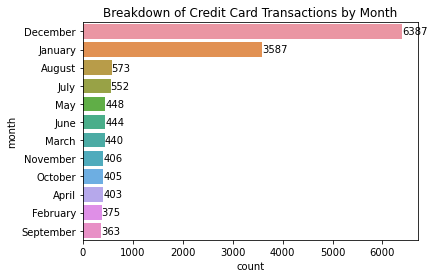

In [87]:
# Get the sorted index of categories based on their counts
sorted_categories_fraud_df_months = fraud_df['month'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='month', data=fraud_df, order=sorted_categories_fraud_df_months)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Credit Card Transactions by Month")

In [88]:
# Creating a mapping table to convert the months of the year back to numerical values

month_mapping_reverse = {
                 "January" : "1",
                 "February" : "2",
                 "March" : "3",
                 "April" : "4", 
                 "May" : "5",
                 "June" : "6",
                 "July" : "7",
                 "August" : "8",
                 "September" : "9",
                 "October" : "10",
                 "November" : "11",
                 "December" : "12",
                                }

In [89]:
# Applying the mapping table to the 'Month' column in order to convert the months back to numerical values

fraud_df['month'] = fraud_df['month'].map(month_mapping_reverse)

In [90]:
# Converting the 'Month' column to integer

fraud_df['month'] = fraud_df['month'].apply(lambda x: int(x))

In [91]:
# Examining the data type of the 'Month' column

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   category               14383 non-null  object        
 2   amt                    14383 non-null  float64       
 3   region                 14383 non-null  object        
 4   lat                    14383 non-null  float64       
 5   long                   14383 non-null  float64       
 6   city_pop               14383 non-null  int64         
 7   dob                    14383 non-null  object        
 8   merch_lat              14383 non-null  float64       
 9   merch_long             14383 non-null  float64       
 10  is_fraud               14383 non-null  object        
 11  hour                   14383 non-null  int64         
 12  month                  14383 non-null  int64         
dtypes

In [92]:
# Creating the 'Month' column by extrapolating the hour from the 'Transaction Date / Transaction Time' column via "all_fraud_cases" dataframe

all_fraud_cases['month'] = all_fraud_cases['trans_date_trans_time'].dt.month

In [93]:
# Checking whether or not the 'Month' column has been created via "all_fraud_cases" dataframe

all_fraud_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 13396
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1844 non-null   datetime64[ns]
 1   merchant               1844 non-null   object        
 2   category               1844 non-null   object        
 3   amt                    1844 non-null   float64       
 4   city                   1844 non-null   object        
 5   state                  1844 non-null   object        
 6   lat                    1844 non-null   float64       
 7   long                   1844 non-null   float64       
 8   city_pop               1844 non-null   int64         
 9   job                    1844 non-null   object        
 10  dob                    1844 non-null   object        
 11  trans_num              1844 non-null   object        
 12  merch_lat              1844 non-null   float64       
 13  me

In [94]:
# Converting the 'Month' column to string

all_fraud_cases['month'] = all_fraud_cases['month'].apply(lambda x: str(x))

In [95]:
# Applying the mapping table to the 'Month' column via "all_fraud_cases" dataframe

all_fraud_cases['month'] = all_fraud_cases['month'].map(month_mapping)

In [96]:
# Examining the value counts for each hour in the 'Month' column "all_fraud_cases" dataframe

all_fraud_cases['month'].value_counts()

January      223
March        190
May          178
October      157
August       156
February     155
September    150
April        147
July         141
December     138
November     130
June          79
Name: month, dtype: int64

Text(0.5, 1.0, 'Breakdown of Fraud Cases by Month')

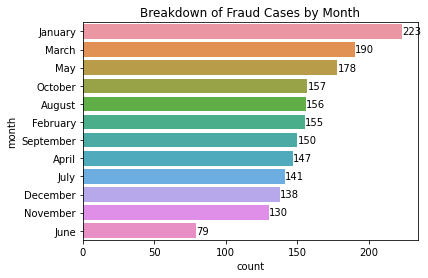

In [100]:
# Get the sorted index of categories based on their counts
sorted_categories_all_fraud_cases_months = all_fraud_cases['month'].value_counts().index

# Creating the bar chart
ax = sns.countplot(y='month', data=all_fraud_cases, order=sorted_categories_all_fraud_cases_months)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Fraud Cases by Month")

**Transaction Date | Transaction Time Column**
- Create a hour column based on the Transaction Date | Transaction Time Column
- Create a month column based on the Transaction Date | Transaction Time Column
- Create a year column based on the Transaction Date | Transaction Time Column
- Drop the Transaction Date | Transaction Time Column

# Modeling

# Overall Conclusion and Recommendations

## Overall Conclusion

## Recommendations